In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas import *
from itertools import groupby
np.random.seed(1234)


['net_size']
['run-20220426_1719100-tag-Test Error_u.csv', 'run-20220426_1719100-tag-Train_u.csv']
['run-20220426_1719300-tag-Test Error_u.csv', 'run-20220426_1719300-tag-Train_u.csv']
['run-20220426_1719500-tag-Test Error_u.csv', 'run-20220426_1719500-tag-Train_u.csv']
['run-20220426_1719700-tag-Test Error_u.csv', 'run-20220426_1719700-tag-Train_u.csv']
['run-20220426_1719900-tag-Test Error_u.csv', 'run-20220426_1719900-tag-Train_u.csv']
['run-20220420_140310000-tag-Test Error_u.csv', 'run-20220420_140310000-tag-Test Error_v.csv', 'run-20220420_140310000-tag-Train_u.csv', 'run-20220420_140310000-tag-Train_v.csv']
['run-20220420_14035000-tag-Test Error_u.csv', 'run-20220420_14035000-tag-Test Error_v.csv', 'run-20220420_14035000-tag-Train_u.csv', 'run-20220420_14035000-tag-Train_v.csv']
['run-20220420_1458500-tag-Test Error_u.csv', 'run-20220420_1458500-tag-Test Error_v.csv', 'run-20220420_1458500-tag-Train_u.csv', 'run-20220420_1458500-tag-Train_v.csv']
['run-20220421_16061000-tag-Test

<Figure size 432x288 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

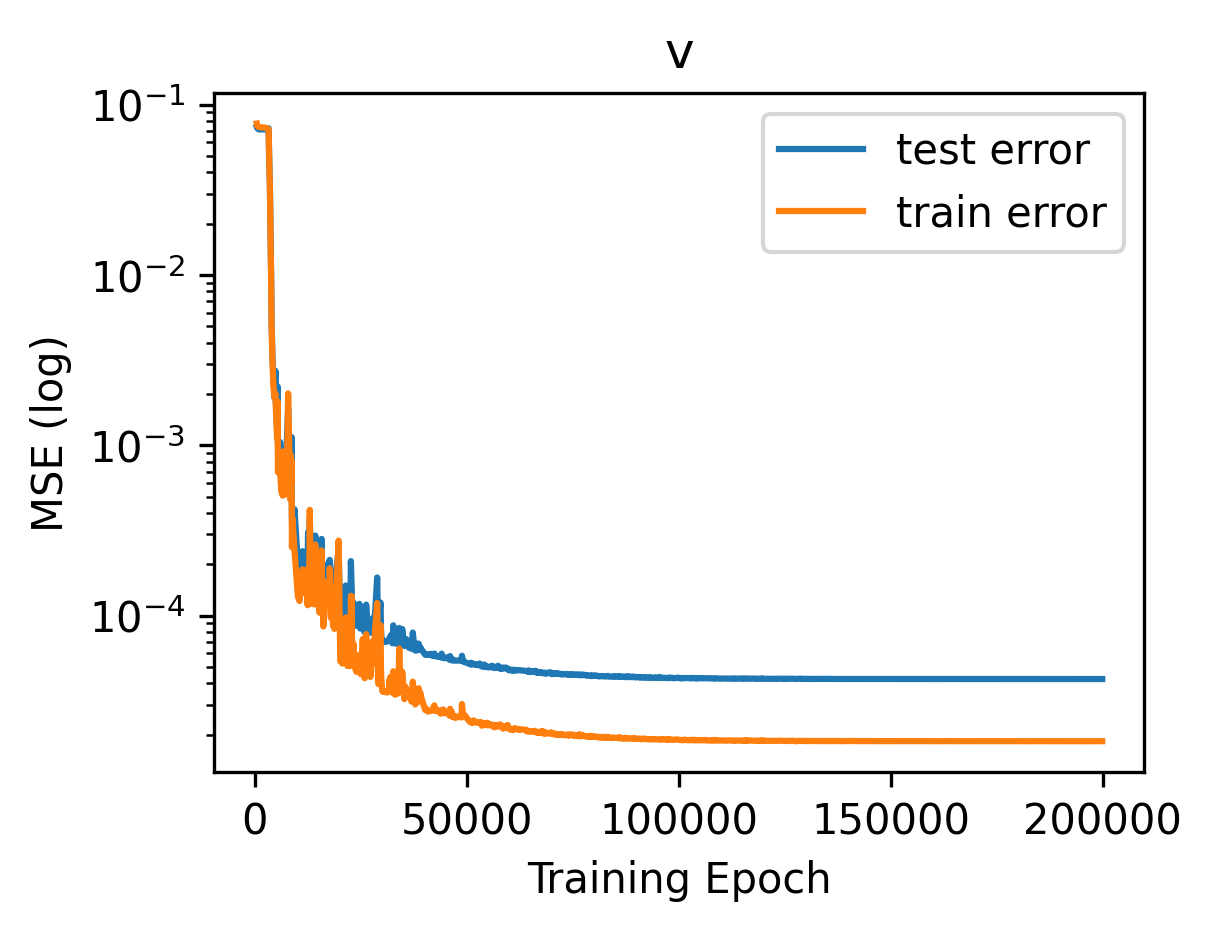

In [10]:
data_path = './data/train'
files = []
file_paths = []
for file in os.listdir(data_path):
    # print(file)
    files.append(file)

# group by training date
files = [list(g) for k, g in groupby(sorted(files), lambda x: x.split('-', 2)[:2])]
files.sort(key=lambda s: len(s))
for f in files:
    print(f)


def plot(xs, ys, ls, savepath='', title=''):
    plt.clf()
    plt.figure(figsize=(4, 3), dpi=300)
    print(len(xs), len(ys), ls)
    for x, y, l in zip(xs, ys, ls):
        plt.plot(x,y,label=l)
    plt.legend()
    plt.title(title)
    plt.yscale('log')
    plt.ylabel('MSE (log)')
    plt.xlabel('Training Epoch')
    plt.savefig(savepath, bbox_inches='tight', dpi=300)

xs, ys = [], []
# idx = 2 # the group
keyword = '481000-'
# for f in files[idx]: 
for group in files:
    if keyword in group[0]:
        for f in group:
            if '_u' in f:
                file_path = os.path.join(data_path, f)
                data = read_csv(file_path)
                xs.append(data['Step'])
                ys.append(data['Value'])
plot(xs, ys, ls=['test error', 'train error'], savepath=f'./figures/compare_u.png', title='u')


xs, ys = [], []
# for f in files[idx]:
for group in files:
    if keyword in group[0]:
        for f in group:
            if '_v' in f:
                file_path = os.path.join(data_path, f)
                data = read_csv(file_path)
                xs.append(data['Step'])
                ys.append(data['Value'])
plot(xs, ys, ls=['test error', 'train error'], savepath=f'./figures/compare_v.png', title='v')


# for i, f in enumerate(files[0]):
#     file_path = os.path.join(data_path, f)
#     print(f)
#     data = read_csv(file_path)
#     xs.append(data['Step'])
#     ys.append(data['Value'])
#     if (i+1) % 2 == 0:
#         figname = 'compare_u' if '_u' in f else 'compare_v'
#         plot(xs, ys, ls=['test error', 'train error'], savepath=f'./figures/{figname}.png')
#         xs, ys = [], []



# NS equation different number of data points

run-20220424_1600100-tag-Train_u.csv
run-20220424_1600100-tag-Test Error_u.csv
run-20220424_1600300-tag-Test Error_u.csv
run-20220424_1600300-tag-Train_u.csv
run-20220424_1600500-tag-Train_u.csv
run-20220424_1600500-tag-Test Error_u.csv
run-20220424_1600700-tag-Test Error_u.csv
run-20220424_1600700-tag-Train_u.csv
run-20220423_21481000-tag-Train_u.csv
run-20220423_21481000-tag-Test Error_u.csv
run-20220424_1600100-tag-Test Error_v.csv
run-20220424_1600100-tag-Train_v.csv
run-20220424_1600300-tag-Test Error_v.csv
run-20220424_1600300-tag-Train_v.csv
run-20220424_1600500-tag-Train_v.csv
run-20220424_1600500-tag-Test Error_v.csv
run-20220424_1600700-tag-Train_v.csv
run-20220424_1600700-tag-Test Error_v.csv
run-20220423_21481000-tag-Test Error_v.csv
run-20220423_21481000-tag-Train_v.csv


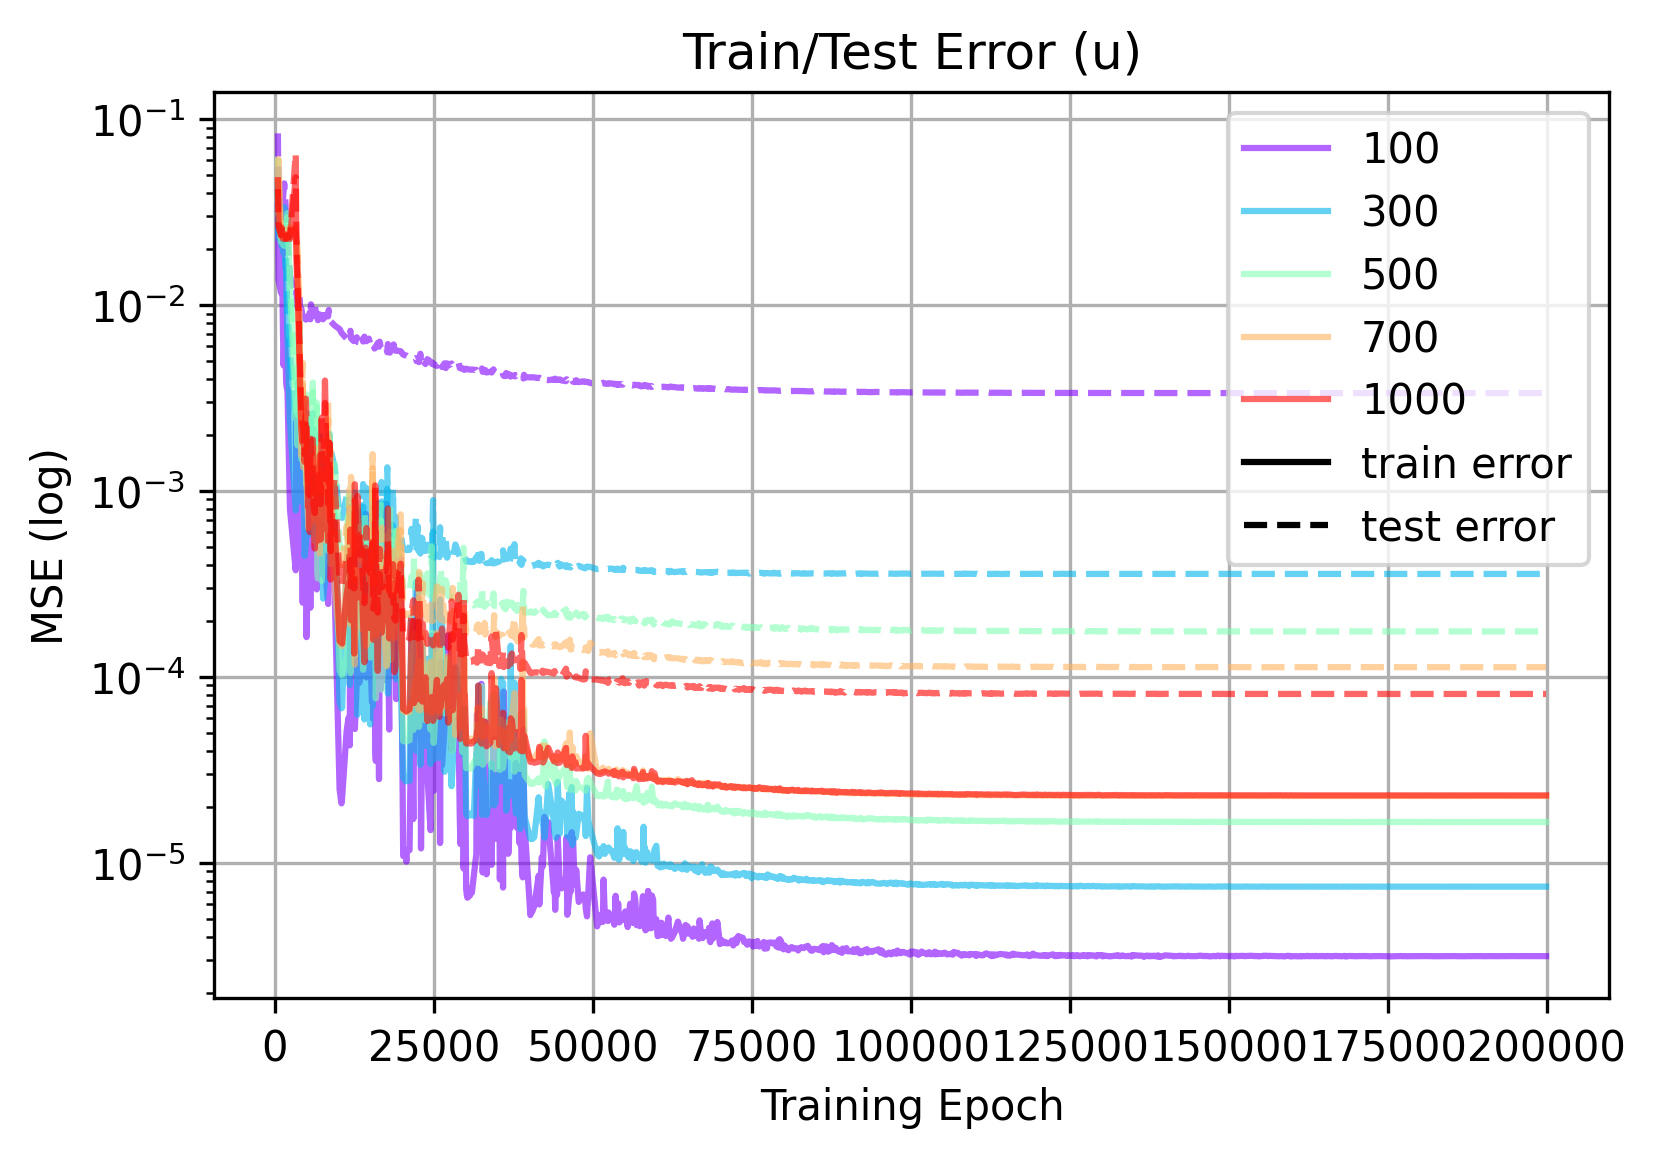

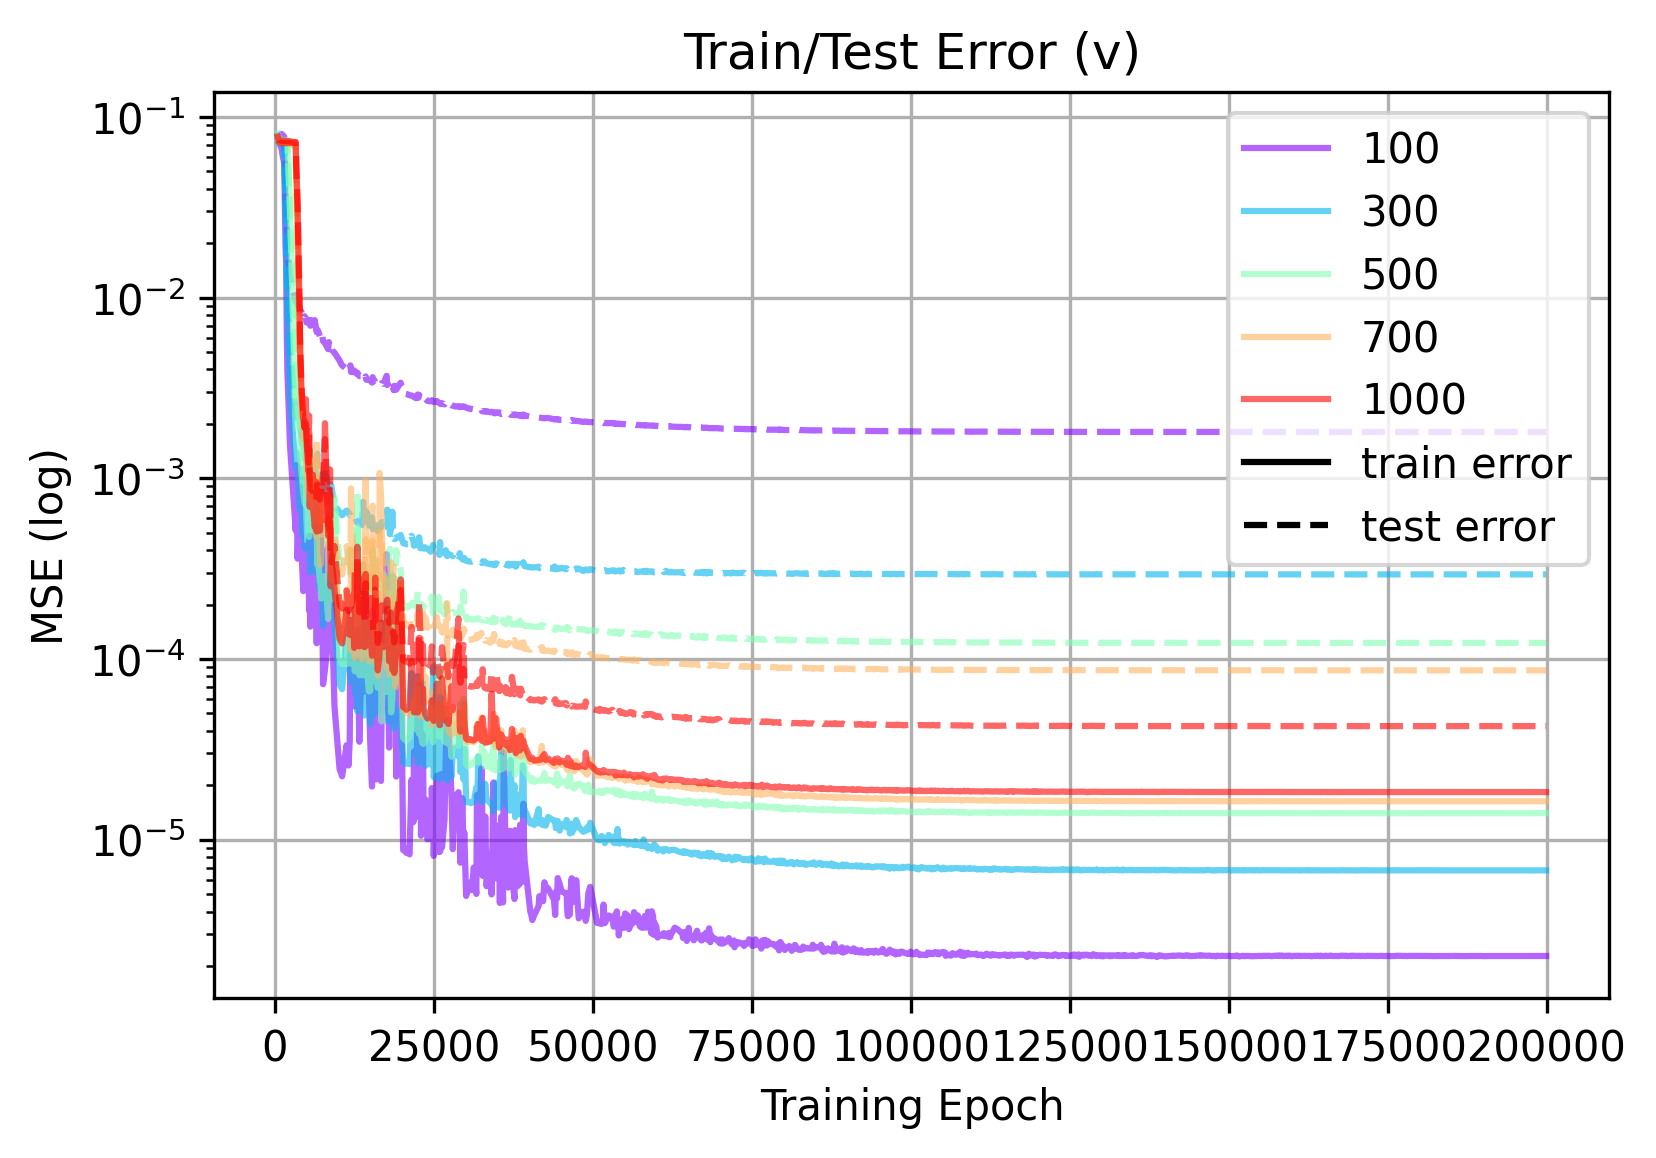

In [50]:
import matplotlib.cm as cm
from matplotlib.lines import Line2D
data_path = './data/train'
files = []
file_paths = []
for file in os.listdir(data_path):
    # print(file)
    files.append(file)

def plot(x, y, l, color, savepath='', line=None, title='', log=True):
    plt.plot(x,y,line, c=color, label=l, alpha=0.6)
    if log:
        plt.yscale('log')


xs, ys = [], []
dates = ['0423', '0424']  # train with 2 dataset
data = [100, 300, 500, 700, 1000]
plt.figure(figsize=(6, 4), dpi=300)
colors = cm.rainbow(np.linspace(0, 1, len(data)))
for d, c in zip(data, colors):
    for f in files:
        for date in dates:
            if date in f and str(d)+'-' in f and '_u' in f:
                print(f)
                file_path = os.path.join(data_path, f)
                data = read_csv(file_path)
                if 'Test' in f:
                    plot(data['Step'], data['Value'], l=None, color=c, line='--', title='u')
                else:
                    plot(data['Step'], data['Value'], l=str(d), color=c, line='-', title='u')
plt.ylabel('MSE (log)')
plt.xlabel('Training Epoch')
plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
train_line = Line2D([0], [0], label='train error', color='k')
test_line = Line2D([0], [0],linestyle='--', label='test error', color='k')
handles.extend([train_line, test_line])
plt.legend(handles=handles)
plt.title('Train/Test Error (u)')
plt.savefig('./figures/compare_u.png', bbox_inches='tight', dpi=300)




xs, ys = [], []
dates = ['0423', '0424']  # train with 2 dataset
data = [100, 300, 500, 700, 1000]
plt.figure(figsize=(6, 4), dpi=300)
colors = cm.rainbow(np.linspace(0, 1, len(data)))
for d, c in zip(data, colors):
    for f in files:
        for date in dates:
            if date in f and str(d)+'-' in f and '_v' in f:
                print(f)
                file_path = os.path.join(data_path, f)
                data = read_csv(file_path)
                if 'Test' in f:
                    plot(data['Step'], data['Value'], l=None, color=c, line='--', title='u')
                else:
                    plot(data['Step'], data['Value'], l=str(d), color=c, line='-', title='u')
plt.ylabel('MSE (log)')
plt.xlabel('Training Epoch')
plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
train_line = Line2D([0], [0], label='train error', color='k')
test_line = Line2D([0], [0],linestyle='--', label='test error', color='k')
handles.extend([train_line, test_line])
plt.legend(handles=handles)
plt.title('Train/Test Error (v)')
plt.savefig('./figures/compare_v.png', bbox_inches='tight', dpi=300)


run-20220424_1600100-tag-Train_v.csv
run-20220424_1600300-tag-Train_v.csv
run-20220424_1600500-tag-Train_v.csv
run-20220424_1600700-tag-Train_v.csv
run-20220423_21481000-tag-Train_v.csv
run-20220424_1600100-tag-Train_u.csv
run-20220424_1600300-tag-Train_u.csv
run-20220424_1600500-tag-Train_u.csv
run-20220424_1600700-tag-Train_u.csv
run-20220423_21481000-tag-Train_u.csv


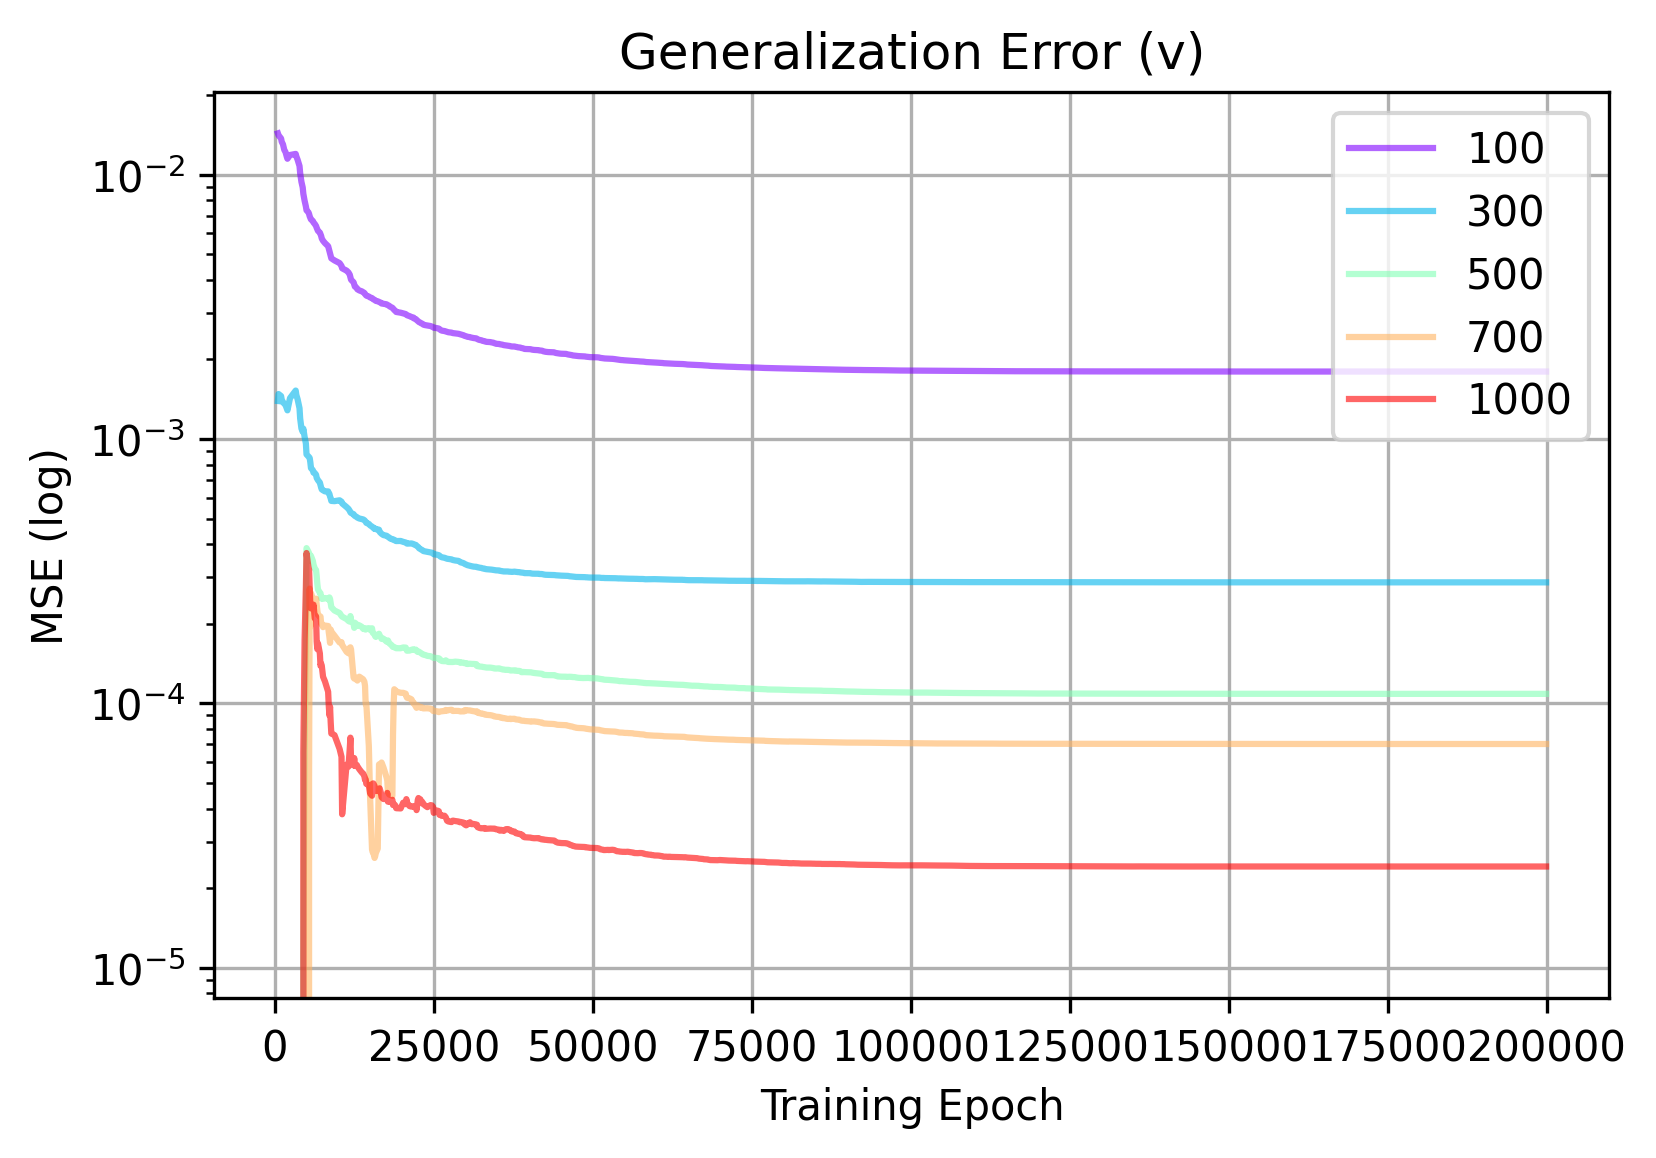

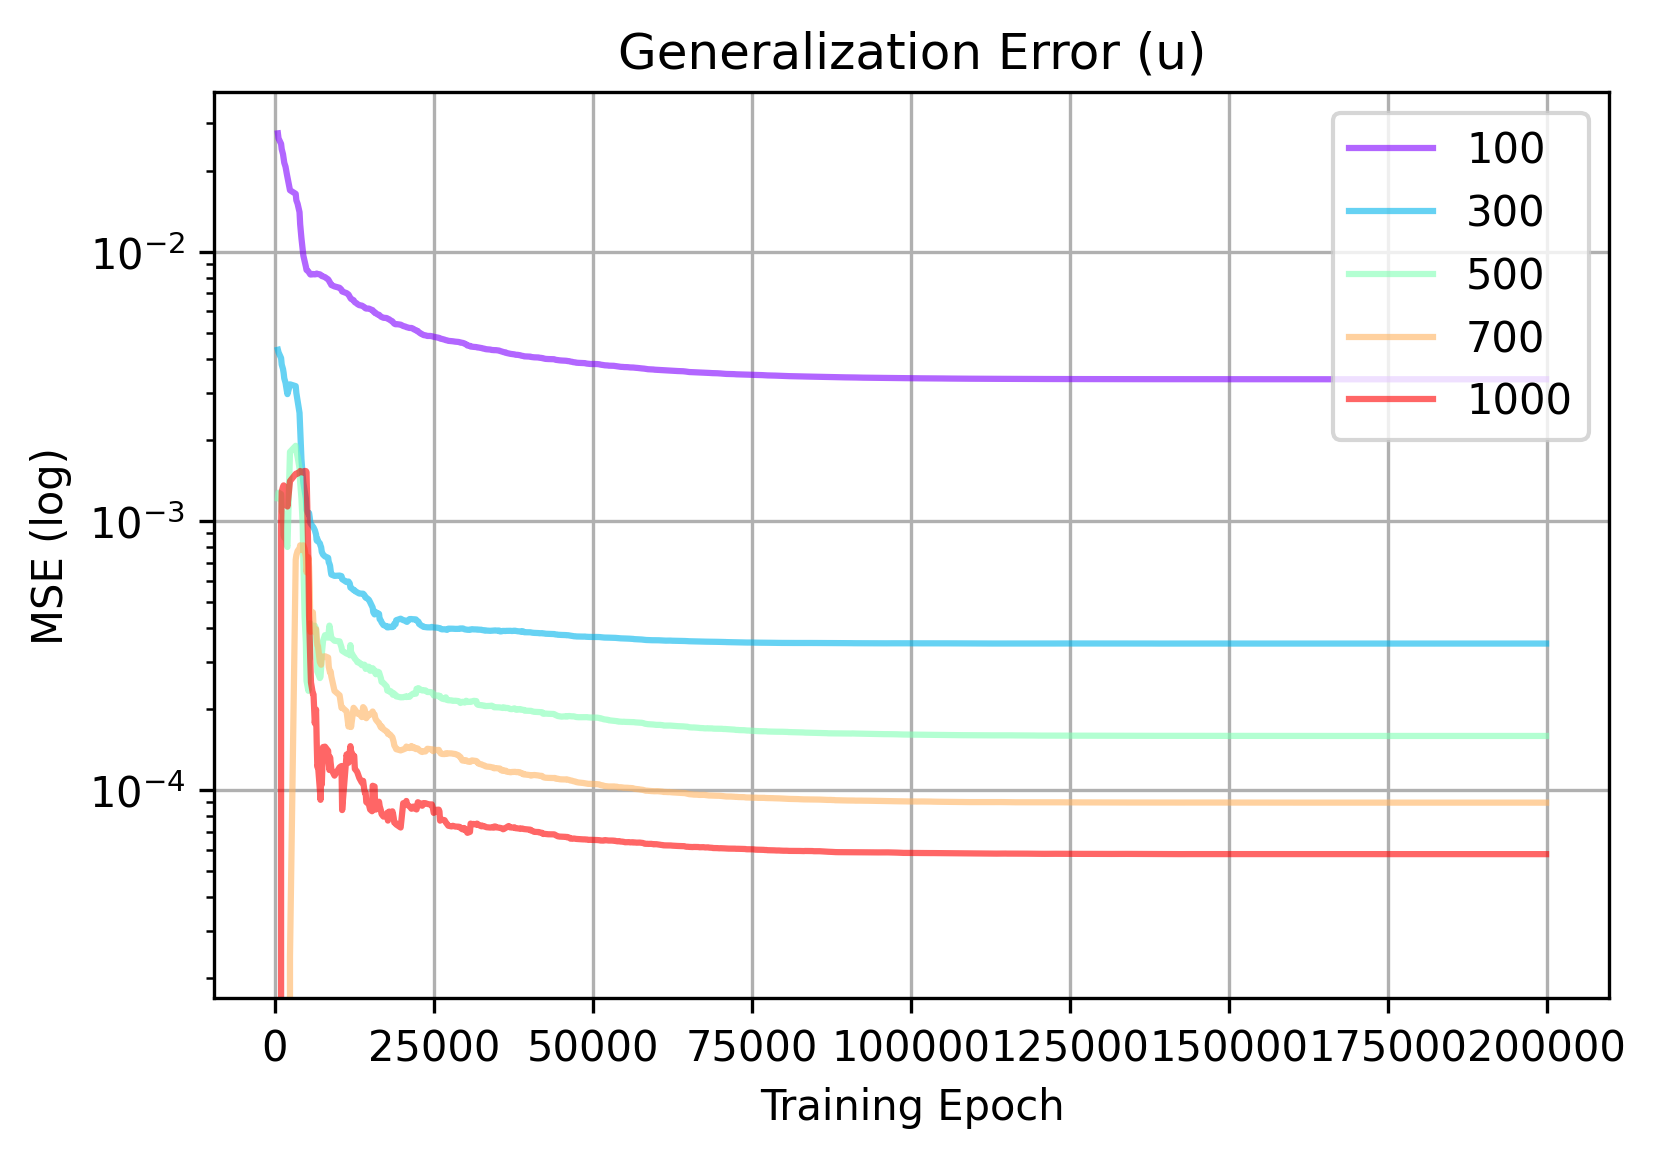

In [55]:
def smooth(y, radius=200, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
                np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
                np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

# generalization: test - train
xs, ys = [], []
dates = ['0423', '0424']  # train with 2 dataset
data = [100, 300, 500, 700, 1000]
plt.figure(figsize=(6, 4), dpi=300)
colors = cm.rainbow(np.linspace(0, 1, len(data)))
for d, c in zip(data, colors):
    for f in files:
        for date in dates:
            if date in f and str(d)+'-' in f and '_v' in f and 'Train' in f:
                print(f)
                train_file_path = os.path.join(data_path, f)
                train_data = read_csv(train_file_path)
                test_file_path = train_file_path.replace('Train', 'Test Error')
                test_data = read_csv(test_file_path)
                gen_err = test_data['Value']-train_data['Value']
                plot(train_data['Step'], smooth(gen_err, 10), l=str(d), color=c, line='-', title='u')
plt.ylabel('MSE (log)')
plt.xlabel('Training Epoch')
plt.grid()
plt.legend()
plt.title('Generalization Error (v)')
plt.savefig('./figures/general_v.png', bbox_inches='tight', dpi=300)


def smooth(y, radius=200, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
                np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
                np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

# generalization: test - train
xs, ys = [], []
dates = ['0423', '0424']  # train with 2 dataset
data = [100, 300, 500, 700, 1000]
plt.figure(figsize=(6, 4), dpi=300)
colors = cm.rainbow(np.linspace(0, 1, len(data)))
for d, c in zip(data, colors):
    for f in files:
        for date in dates:
            if date in f and str(d)+'-' in f and '_u' in f and 'Train' in f:
                print(f)
                train_file_path = os.path.join(data_path, f)
                train_data = read_csv(train_file_path)
                test_file_path = train_file_path.replace('Train', 'Test Error')
                test_data = read_csv(test_file_path)
                gen_err = test_data['Value']-train_data['Value']
                plot(train_data['Step'], smooth(gen_err, 10), l=str(d), color=c, line='-', title='u')
plt.ylabel('MSE (log)')
plt.xlabel('Training Epoch')
plt.grid()
plt.legend()
plt.title('Generalization Error (u)')
plt.savefig('./figures/general_u.png', bbox_inches='tight', dpi=300)





# Heat equation different number of datapoints

run-20220426_1719100-tag-Test Error_u.csv
run-20220426_1719100-tag-Train_u.csv
run-20220426_1719300-tag-Test Error_u.csv
run-20220426_1719300-tag-Train_u.csv
run-20220426_1719500-tag-Test Error_u.csv
run-20220426_1719500-tag-Train_u.csv
run-20220426_1719700-tag-Train_u.csv
run-20220426_1719700-tag-Test Error_u.csv
run-20220426_1719900-tag-Train_u.csv
run-20220426_1719900-tag-Test Error_u.csv


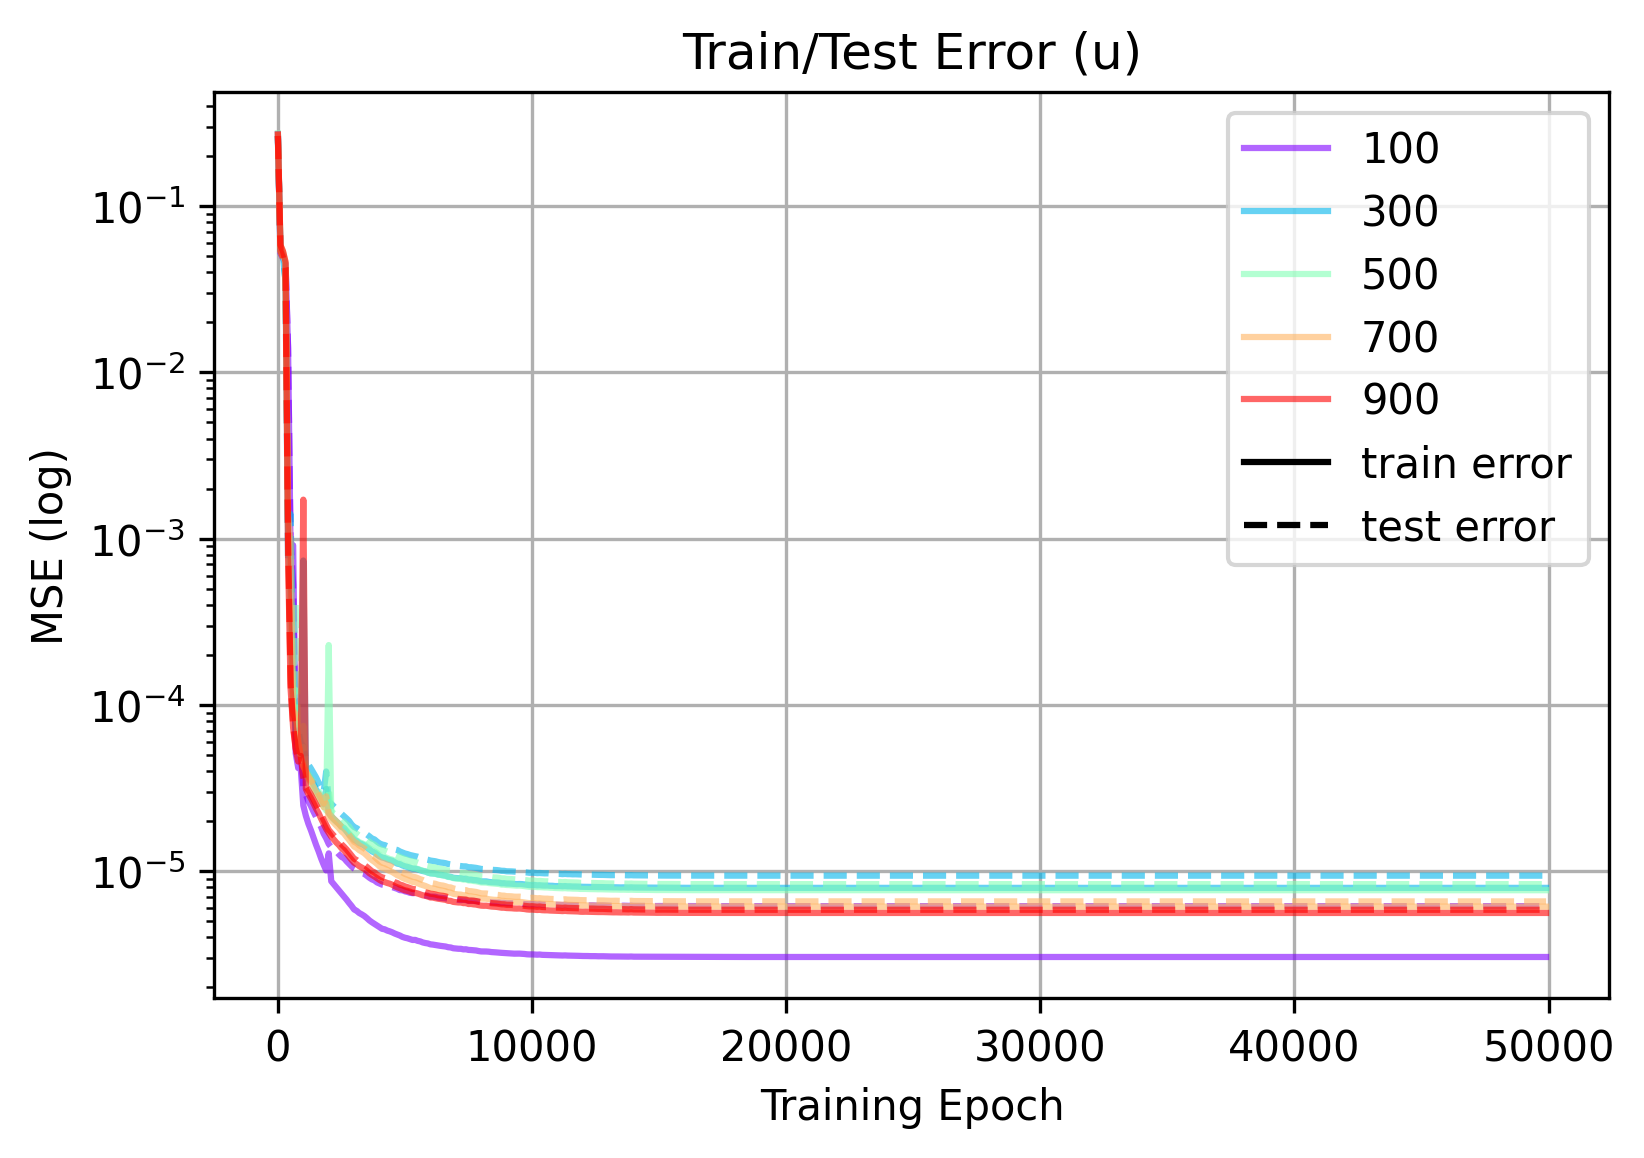

In [3]:
import matplotlib.cm as cm
from matplotlib.lines import Line2D
data_path = './data/train'
files = []
file_paths = []
for file in os.listdir(data_path):
    # print(file)
    files.append(file)

def plot(x, y, l, color, savepath='', line=None, title='', log=True):
    plt.plot(x,y,line, c=color, label=l, alpha=0.6)
    if log:
        plt.yscale('log')


xs, ys = [], []
dates = ['0426']  # train with 2 dataset
data = [100, 300, 500, 700, 900]
plt.figure(figsize=(6, 4), dpi=300)
colors = cm.rainbow(np.linspace(0, 1, len(data)))
for d, c in zip(data, colors):
    for f in files:
        for date in dates:
            if date in f and str(d)+'-' in f and '_u' in f:
                print(f)
                file_path = os.path.join(data_path, f)
                data = read_csv(file_path)
                if 'Test' in f:
                    plot(data['Step'], data['Value'], l=None, color=c, line='--', title='u')
                else:
                    plot(data['Step'], data['Value'], l=str(d), color=c, line='-', title='u')
plt.ylabel('MSE (log)')
plt.xlabel('Training Epoch')
plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
train_line = Line2D([0], [0], label='train error', color='k')
test_line = Line2D([0], [0],linestyle='--', label='test error', color='k')
handles.extend([train_line, test_line])
plt.legend(handles=handles)
plt.title('Train/Test Error (u)')
plt.savefig('./figures/compare_u_heat.png', bbox_inches='tight', dpi=300)


run-20220426_1719100-tag-Train_u.csv
run-20220426_1719300-tag-Train_u.csv
run-20220426_1719500-tag-Train_u.csv
run-20220426_1719700-tag-Train_u.csv
run-20220426_1719900-tag-Train_u.csv


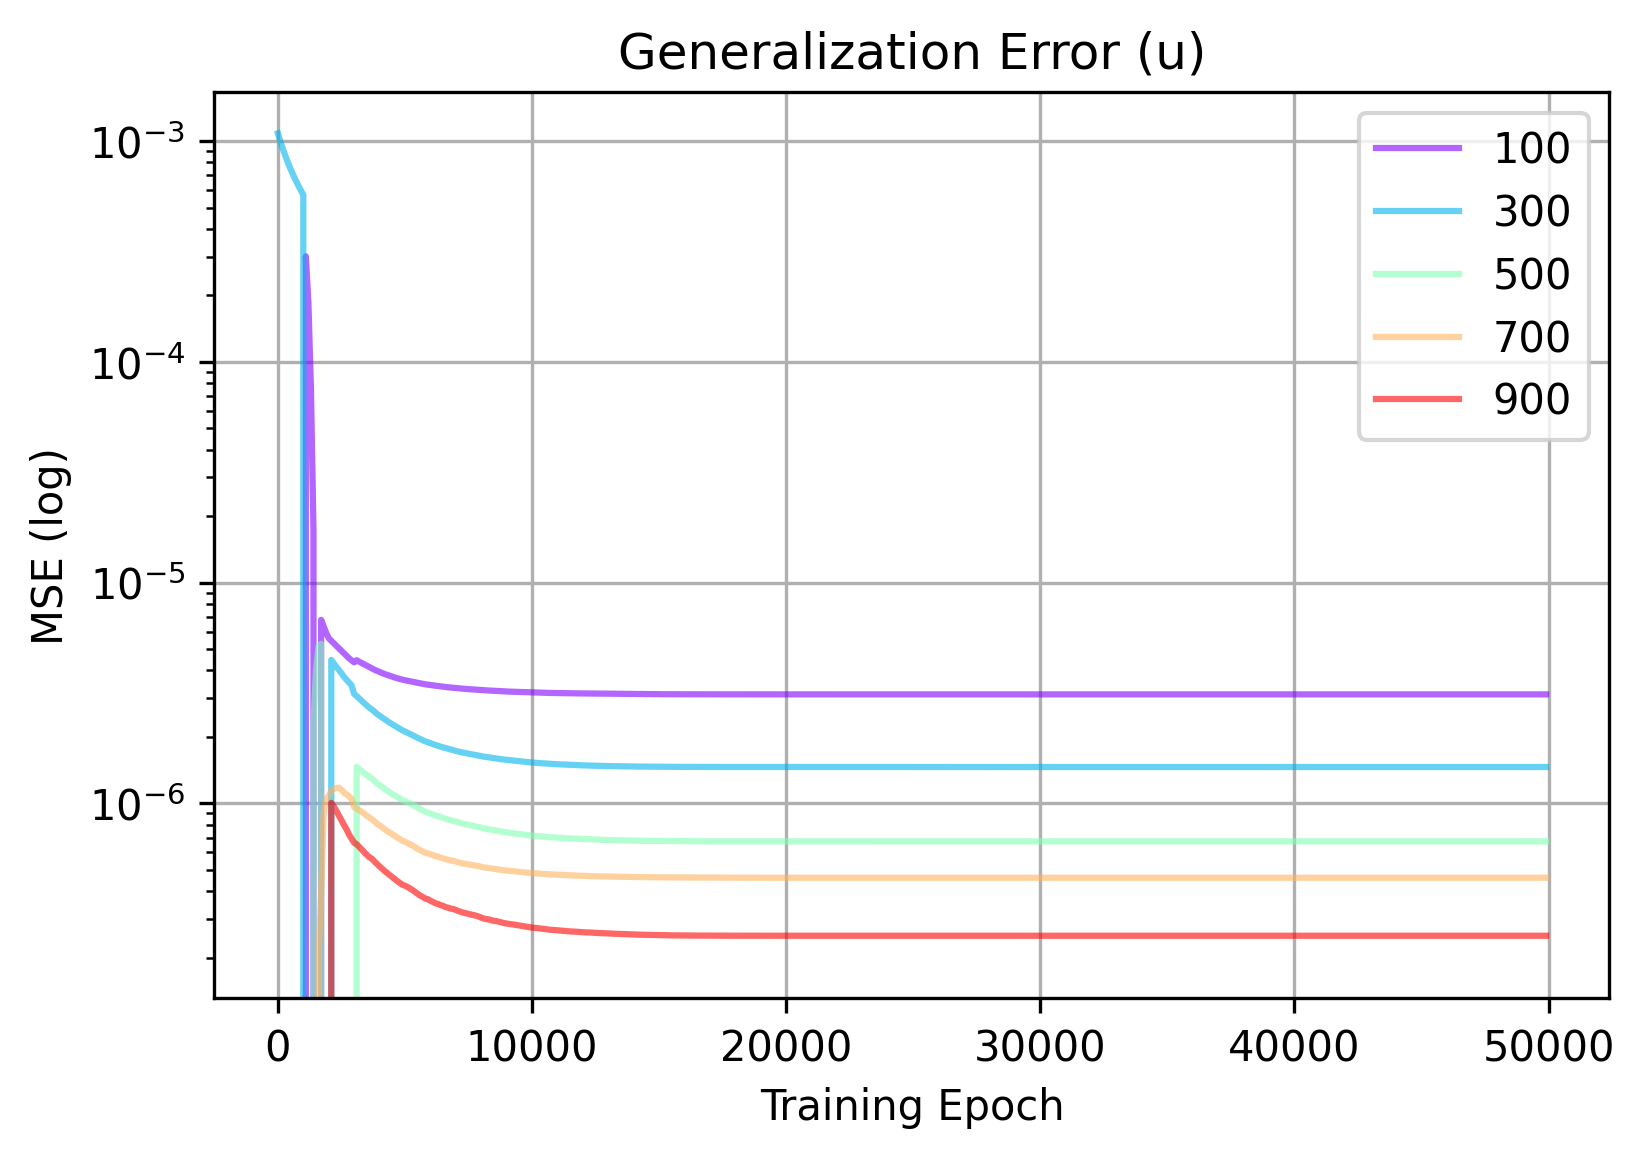

In [4]:
def smooth(y, radius=200, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
                np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
                np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

# generalization: test - train
xs, ys = [], []
dates = ['0426']  # train with 2 dataset
data = [100, 300, 500, 700, 900]
plt.figure(figsize=(6, 4), dpi=300)
colors = cm.rainbow(np.linspace(0, 1, len(data)))
for d, c in zip(data, colors):
    for f in files:
        for date in dates:
            if date in f and str(d)+'-' in f and '_u' in f and 'Train' in f:
                print(f)
                train_file_path = os.path.join(data_path, f)
                train_data = read_csv(train_file_path)
                test_file_path = train_file_path.replace('Train', 'Test Error')
                test_data = read_csv(test_file_path)
                gen_err = test_data['Value']-train_data['Value']
                plot(train_data['Step'], smooth(gen_err, 10), l=str(d), color=c, line='-', title='u')
plt.ylabel('MSE (log)')
plt.xlabel('Training Epoch')
plt.grid()
plt.legend()
plt.title('Generalization Error (u)')
plt.savefig('./figures/general_u_heat.png', bbox_inches='tight', dpi=300)

# Heat equation different network size

run-20220426_1719100size20-tag-Train_u.csv
run-20220426_1719100size20-tag-Test Error_u.csv
run-20220426_2024100size64-tag-Train_u.csv
run-20220426_2024100size64-tag-Test Error_u.csv
run-20220426_2025100size128--tag-Test Error_u.csv
run-20220426_2025100size128-tag-Train_u.csv
run-20220426_2029100size256-tag-Test Error_u.csv
run-20220426_2029100size256-tag-Train_u.csv
run-20220426_2031100size512-tag-Test Error_u.csv
run-20220426_2031100size512-tag-Train_u.csv


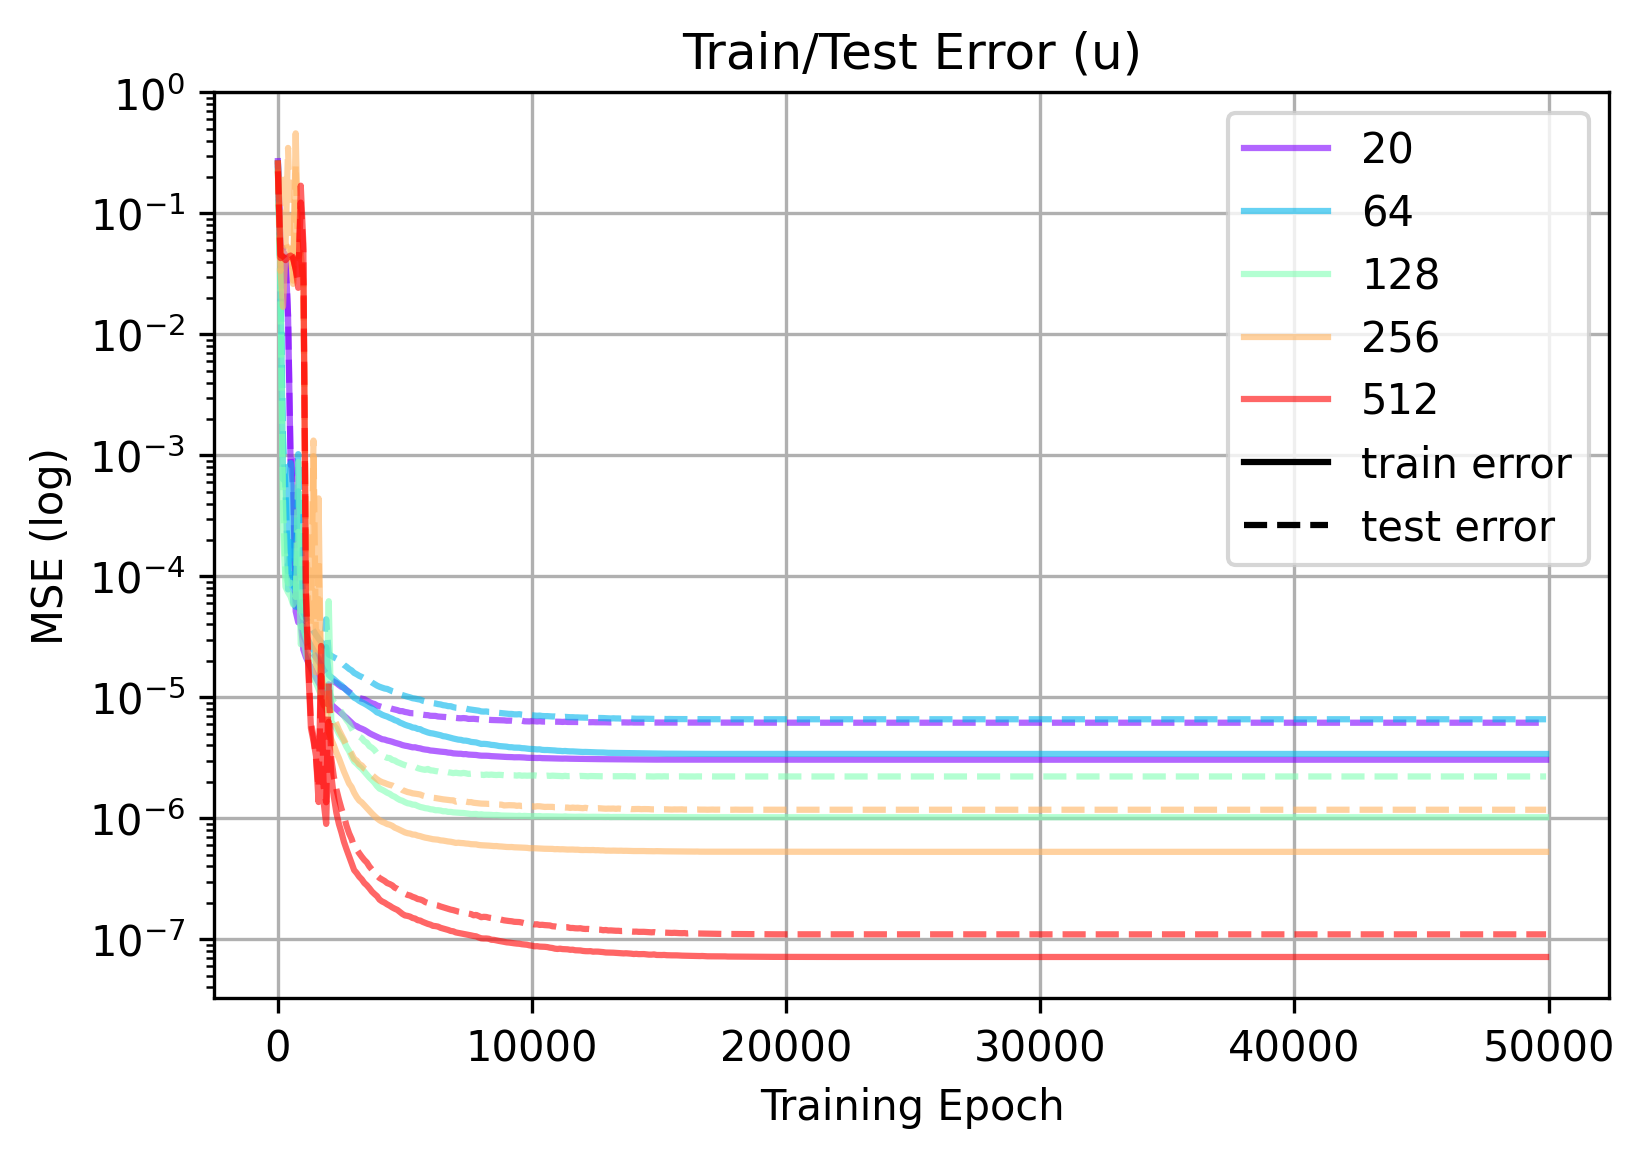

In [12]:
import matplotlib.cm as cm
from matplotlib.lines import Line2D
data_path = './data/train/net_size'
files = []
file_paths = []
for file in os.listdir(data_path):
    # print(file)
    files.append(file)

def plot(x, y, l, color, savepath='', line=None, title='', log=True):
    plt.plot(x,y,line, c=color, label=l, alpha=0.6)
    if log:
        plt.yscale('log')


xs, ys = [], []
dates = ['size']  # train with 2 dataset
data = [20, 64, 128, 256, 512]
plt.figure(figsize=(6, 4), dpi=300)
colors = cm.rainbow(np.linspace(0, 1, len(data)))
for d, c in zip(data, colors):
    for f in files:
        for date in dates:
            if date in f and str(d)+'-' in f and '_u' in f:
                print(f)
                file_path = os.path.join(data_path, f)
                data = read_csv(file_path)
                if 'Test' in f:
                    plot(data['Step'], data['Value'], l=None, color=c, line='--', title='u')
                else:
                    plot(data['Step'], data['Value'], l=str(d), color=c, line='-', title='u')
plt.ylabel('MSE (log)')
plt.xlabel('Training Epoch')
plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
train_line = Line2D([0], [0], label='train error', color='k')
test_line = Line2D([0], [0],linestyle='--', label='test error', color='k')
handles.extend([train_line, test_line])
plt.legend(handles=handles)
plt.title('Train/Test Error (u)')
plt.savefig('./figures/compare_u_heat_size.png', bbox_inches='tight', dpi=300)


run-20220426_1719100size20-tag-Train_u.csv
run-20220426_2024100size64-tag-Train_u.csv
run-20220426_2025100size128-tag-Train_u.csv
run-20220426_2029100size256-tag-Train_u.csv
run-20220426_2031100size512-tag-Train_u.csv


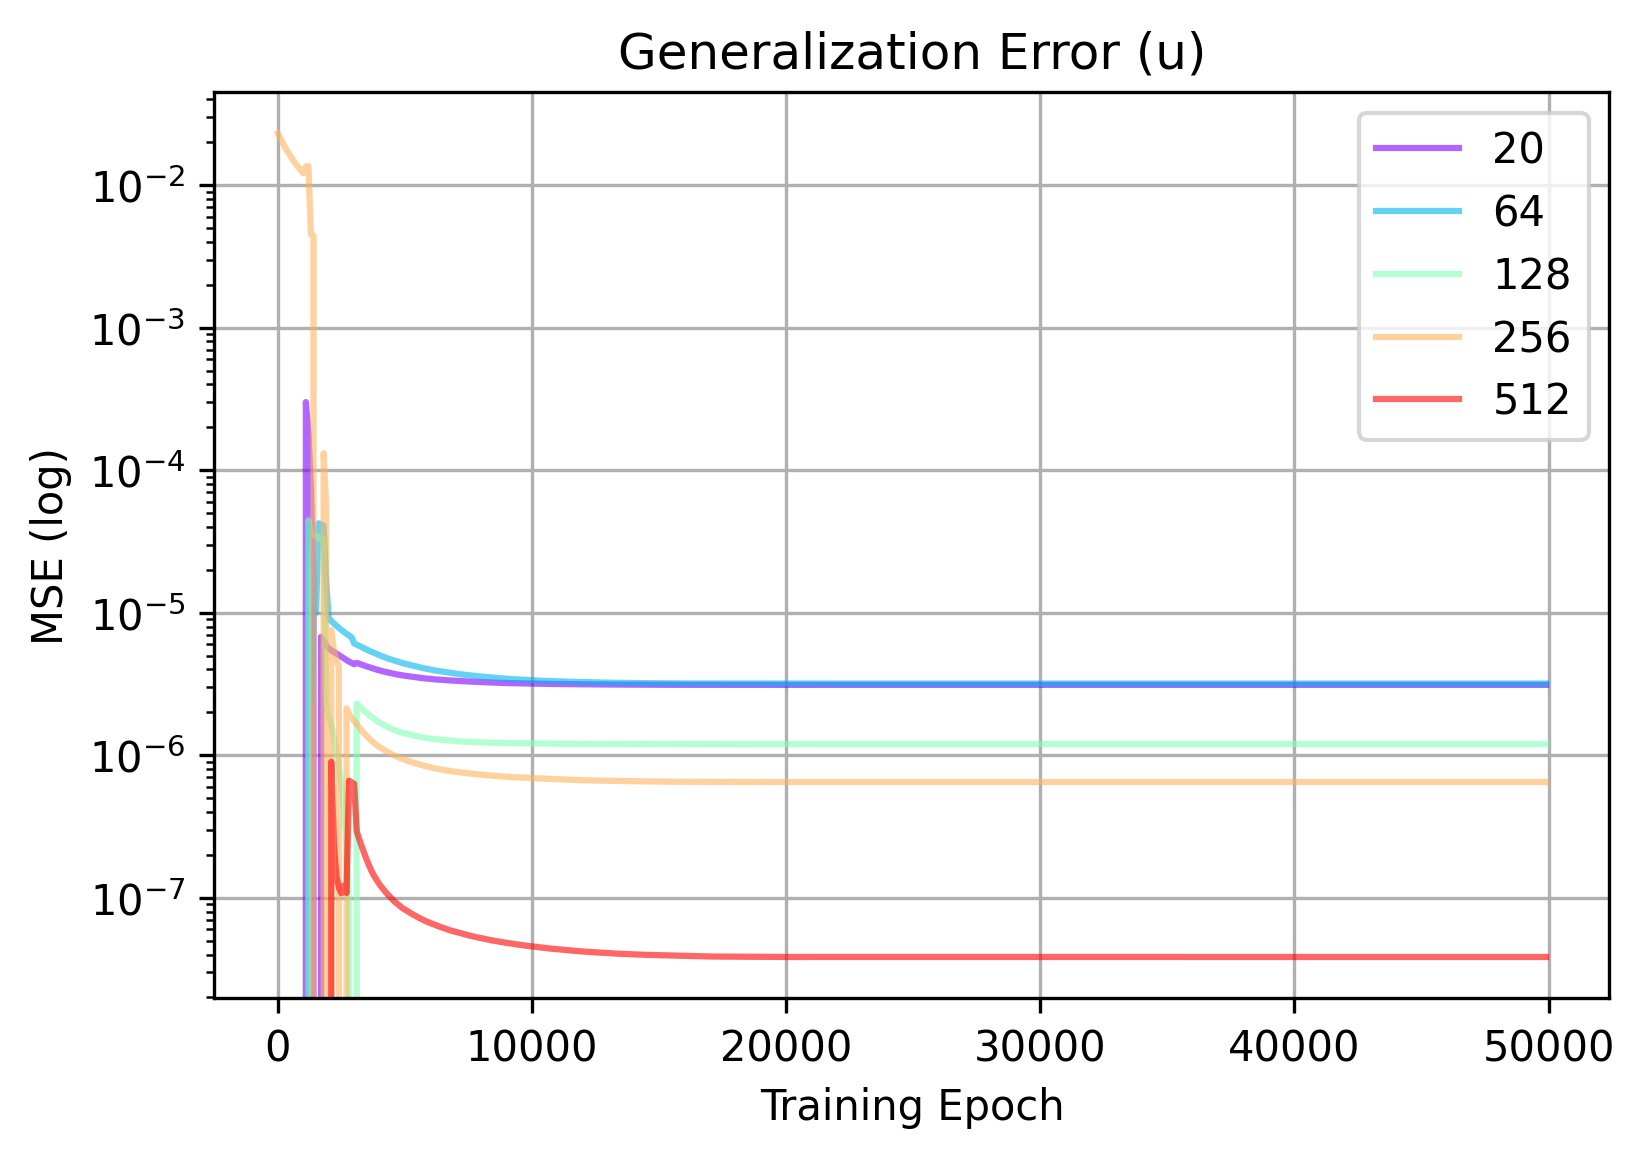

In [14]:
def smooth(y, radius=200, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
                np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
                np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

# generalization: test - train
xs, ys = [], []
dates = ['size']  # train with 2 dataset
data = [20, 64, 128, 256, 512]
plt.figure(figsize=(6, 4), dpi=300)
colors = cm.rainbow(np.linspace(0, 1, len(data)))
for d, c in zip(data, colors):
    for f in files:
        for date in dates:
            if date in f and str(d)+'-' in f and '_u' in f and 'Train' in f:
                print(f)
                train_file_path = os.path.join(data_path, f)
                train_data = read_csv(train_file_path)
                test_file_path = train_file_path.replace('Train', 'Test Error')
                test_data = read_csv(test_file_path)
                gen_err = test_data['Value']-train_data['Value']
                plot(train_data['Step'], smooth(gen_err, 10), l=str(d), color=c, line='-', title='u')
plt.ylabel('MSE (log)')
plt.xlabel('Training Epoch')
plt.grid()
plt.legend()
plt.title('Generalization Error (u)')
plt.savefig('./figures/general_u_heat_size.png', bbox_inches='tight', dpi=300)